In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer #we can appy 3 or more preprocceing steps 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [4]:
df=pd.read_csv("train (1).csv")

In [5]:
df.head()

,id,brand,model_id,year,transmission,fuelType,mileage,tax,mpg,engineSize,price
0,53394,3,17,2019,Automatic,Diesel,7148,145,50.4,2.0,29990
1,27771,2,44,2018,Manual,Diesel,19254,150,60.1,2.0,15750
2,22402,2,33,2017,Manual,Petrol,13275,145,60.1,1.0,10400
3,29944,2,32,2018,Manual,Petrol,20106,145,65.7,1.0,10595
4,47602,3,53,2013,Manual,Petrol,61984,125,51.4,1.2,6191


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38199 entries, 0 to 38198
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            38199 non-null  int64  
 1   brand         38199 non-null  int64  
 2   model_id      38199 non-null  int64  
 3   year          38199 non-null  int64  
 4   transmission  38199 non-null  object 
 5   fuelType      38199 non-null  object 
 6   mileage       38199 non-null  int64  
 7   tax           38199 non-null  int64  
 8   mpg           38199 non-null  float64
 9   engineSize    38199 non-null  float64
 10  price         38199 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 3.2+ MB


In [7]:
df.shape

(38199, 11)

In [8]:
df.columns

Index(['id', 'brand', 'model_id', 'year', 'transmission', 'fuelType',
       'mileage', 'tax', 'mpg', 'engineSize', 'price'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i,"-->",df[i].nunique())

id --> 38199
brand --> 4
model_id --> 100
year --> 26
transmission --> 3
fuelType --> 5
mileage --> 23517
tax --> 42
mpg --> 145
engineSize --> 29
price --> 7453


In [10]:
df.corr(numeric_only=True)['price']

id           -0.296948
brand        -0.308709
model_id      0.157119
year          0.538713
mileage      -0.459160
tax           0.361230
mpg          -0.348883
engineSize    0.614152
price         1.000000
Name: price, dtype: float64

In [11]:
df=df.drop(columns=["id"])

<Axes: xlabel='price'>

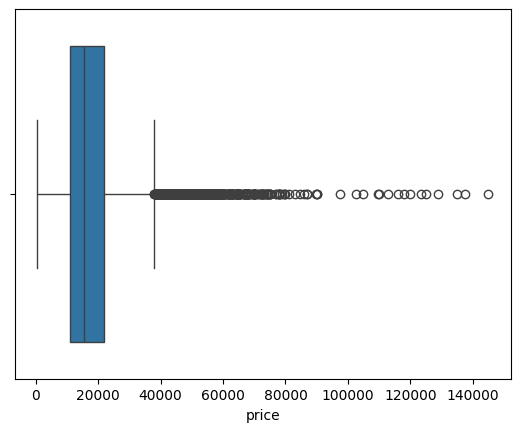

In [12]:
sns.boxplot(df,x="price")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38199 entries, 0 to 38198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         38199 non-null  int64  
 1   model_id      38199 non-null  int64  
 2   year          38199 non-null  int64  
 3   transmission  38199 non-null  object 
 4   fuelType      38199 non-null  object 
 5   mileage       38199 non-null  int64  
 6   tax           38199 non-null  int64  
 7   mpg           38199 non-null  float64
 8   engineSize    38199 non-null  float64
 9   price         38199 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.9+ MB


In [14]:
for i in ['transmission', 'fuelType']:
    print(i,"-->",df[i].unique())

transmission --> ['Automatic' 'Manual' 'Semi-Auto']
fuelType --> ['Diesel' 'Petrol' 'Hybrid' 'Other' 'Electric']


In [15]:
X=df.drop("price",axis=1)
y=df.price


In [16]:
num_df=X.select_dtypes(include="number")


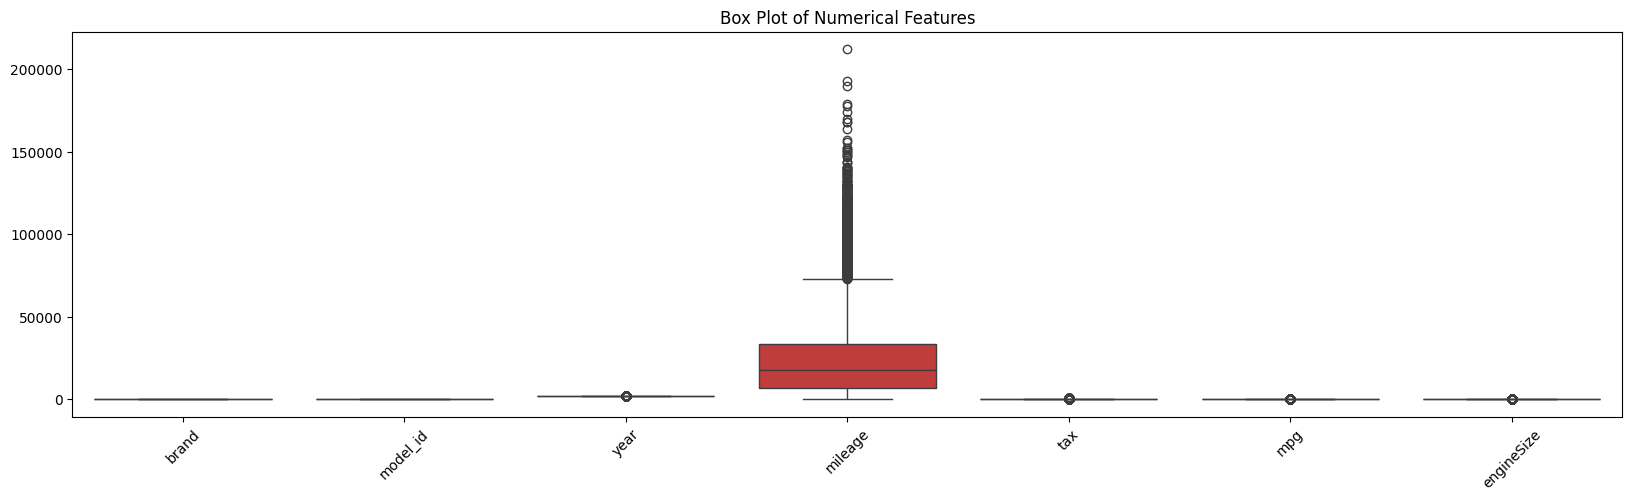

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(data=num_df)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=42)

In [19]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_df.columns),
        ('onehotencoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['transmission']),
        ('OrdinalEncoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['fuelType']),

    ]
)
preprocessing.fit(xtrain,ytrain)

ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 Index(['brand', 'model_id', 'year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['transmission']),
                                ('OrdinalEncoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['fuelType'])])

In [20]:
LinearRegression_pipeline=Pipeline(
    steps=[
('preprocessing',preprocessing),
('model',LinearRegression())
    ]
)

In [21]:
LinearRegression_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['brand', 'model_id', 'year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transmission']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['fuelType'])])),
                ('model', LinearRegression())])

In [22]:
LinearRegression_pipeline.score(xtrain,ytrain)

0.7753610655221004

In [23]:
LinearRegression_pipeline.score(xtest,ytest)

0.7801846308487435

In [24]:
decisiontree_pipeline=Pipeline(
    steps=[
('preprocessing',preprocessing),
('model',DecisionTreeRegressor())
    ]
)

In [25]:
decisiontree_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['brand', 'model_id', 'year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transmission']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['fuelType'])])),
                ('model', DecisionTreeRegressor())])

In [26]:
decisiontree_pipeline.score(xtrain,ytrain)

0.9995475018656846

In [27]:
decisiontree_pipeline.score(xtest,ytest)

0.9303367535913412

In [28]:
RandomForest_pipeline=Pipeline(
    steps=[
('preprocessing',preprocessing),
('model',RandomForestRegressor())
    ]
)

In [59]:
BaggingRegressor_pipeline=Pipeline(
    steps=[
('preprocessing',preprocessing),
('model',BaggingRegressor())
    ]
)

In [60]:
BaggingRegressor_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['brand', 'model_id', 'year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transmission']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['fuelType'])])),
                ('model', BaggingRegressor())])

In [61]:
BaggingRegressor_pipeline.score(xtrain,ytrain)

0.9911605804896395

In [62]:
BaggingRegressor_pipeline.score(xtest,ytest)

0.9575442799221193

In [29]:
RandomForest_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['brand', 'model_id', 'year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transmission']),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['fuelType'])])),
                ('model', RandomForestRegressor())])

In [30]:
RandomForest_pipeline.score(xtrain,ytrain)

0.9930190520140512

In [31]:
RandomForest_pipeline.score(xtest,ytest)

0.9609245801456865

In [32]:
test_df=pd.read_csv("test (1).csv")

In [33]:
test_df1=test_df.drop(columns="id")

In [34]:
test_df1.head(1)

,brand,model_id,year,transmission,fuelType,mileage,tax,mpg,engineSize
0,3,74,2016,Manual,Diesel,31353.81903,20.633243,58.036574,1.918948


In [35]:
ypred=RandomForest_pipeline.predict(test_df1)

In [36]:
new_df=pd.DataFrame({'id':test_df['id'],"price":ypred
})

In [37]:
new_df

,id,price
0,52462,14924.19
1,29710,28143.19
2,21277,15459.65
3,31612,12783.58
4,53244,21597.67
...,...,...
16367,37536,9429.11
16368,53520,19529.24
16369,48008,10664.27
16370,6295,37391.22


In [38]:
new_df.to_csv("new_df.csv",index=False)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [40]:
y=RandomForest_pipeline.predict(xtest)

In [41]:
r2_score(ytest,y)

0.9609245801456865

In [42]:
mean_squared_error(ytest,y)

3666820.404290647

In [43]:
root_mean_squared_error(ytest,y)

1914.8943585197192

In [44]:
model_ecaluation=(root_mean_squared_error(ytest,y))/ytest.mean()

In [45]:
model_ecaluation

np.float64(0.10921528223293674)

The car price prediction model is working very well, with a train score of 99%, test score of 96%, and a low RMSE of 1907.so it is accurate and reliable.